Osnabrück University - Computer Vision (Winter Term 2024/25) - Dr. Ulf Krumnack, Lukas Niehaus, Robin Rawiel

# Exercise Sheet 02: Color & Basic Operators

## Introduction

This week's sheet should be solved and handed in before end of **Monday, November 25, 2023**. If you need help (and Google and other resources were not enough), use the StudIP forum. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (Euclidean Space) [0 Points]

This exercise is supposed to be easy, does not give any points, and is voluntary.
There will be a similar exercise on following sheets.
It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them.
Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session.
Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *Euclidean space*? What is the *Cartesian plane*? How are they usually denoted? How to write points in these spaces?

YOUR ANSWER HERE

**b)** What is the *norm* of a vector in a Euclidean space? How to *add* and *substract* two vectors? How is the *Euclidean distance* defined? Are there other ways to measure distances?

YOUR ANSWER HERE

**c)** What is the (standard) *scalar product* of two vectors? How is it related to the length and angle between these vectors? Name some use cases.

YOUR ANSWER HERE

## Assignment 1: Color perception and color spaces (4 points)

### a) Human color perception

Explain how human color perception works, that is, how light of different frequencies (and mixtures of different frequencies) is perceived as different colors.
Then discuss what light sources/frequencies could be used to induce the perception of the following colors?
* orange
* brown
* purple
* white

YOUR ANSWER HERE

### b) RGB and HSV color space

Compare the RGB and the HSV color spaces. Name advantages and discuss suitable applications for each of them.

YOUR ANSWER HERE

### c) Additive and subtractive color mixing

Explain the ideas of additive and subtractive color mixing. Name examples for each mixing model and describe technical applications.

YOUR ANSWER HERE

### d) 3D color cube

Plot the colors (red, green, blue, yellow, cyan, magenta, grey, black, white) from additive and subtractive color mixing in a 3D cube. 
Plot points on the corresponding locations and give them the appropriate color. 
Hint: to create the points you can use the *ax.scatter* function, where the *c* argument can take in multiple colors.

In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# YOUR CODE HERE
raise NotImplementedError()

ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

## Assignment 2: Twodimensional Convolution (8 points)

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works. Also provide the formula from the lecture and explain its idea.

YOUR ANSWER HERE

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Use formulae and proof your answers. 

Hint:

From  CV-03 slide 49: A function $f$ is linear iff 
$f \left( a \cdot x \right) = a \cdot f \left( x \right) $
and
$f \left( x_1 + x_2 \right) = f \left( x_1 \right) + f \left( x_2 \right)$

A function is homogeneous if translating the filtered image is the same as filtering the translated image. I.e. $\operatorname{translate}(g\ast k,\Delta x,\Delta y)[x,y] = (\operatorname{translate}(g,\Delta x,\Delta y)\ast k)[x,y]$


YOUR ANSWER HERE

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

YOUR ANSWER HERE

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results. Assume that the kernel is of size $m \times n$ and the image is of size $M \times N$. Compute the number of operations first for a single pixel and then extend your answer to the whole image. Ignore the normalization of the kernel, i.e. the fraction in front.

Note that here we define the kernel size as $m \times n$ as opposed to Assignment *c)*. This is a shorter notation.

YOUR ANSWER HERE

## Assignment 3: Applying Convolution (4 points)

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.convolve` to solve this task. Check the documentation to learn how to use this function. In this assignment you do not have to implement the convolution yourself. Realize the following filters, describe their effect and possible applications.

### a) Box filter

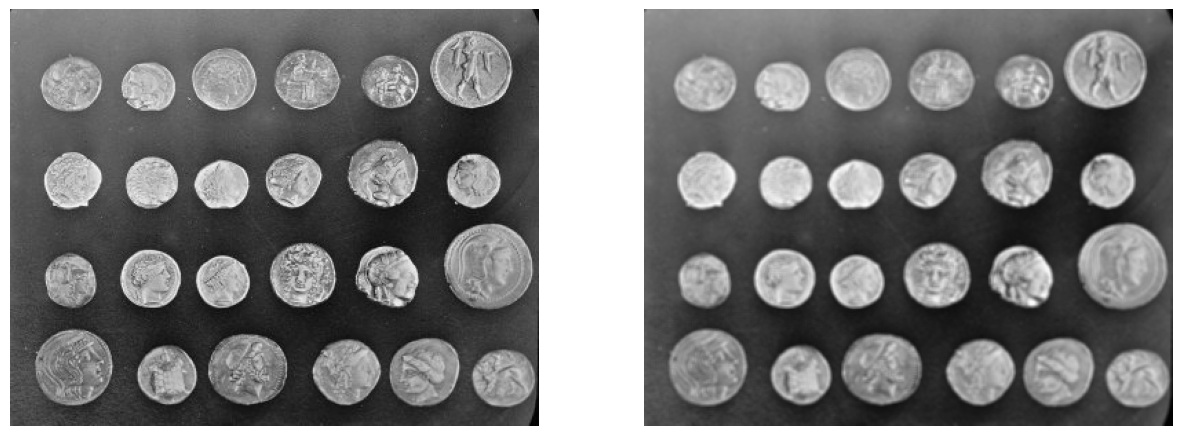

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread
from scipy.ndimage import convolve
from skimage import data

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

# YOUR CODE HERE
def box_filter(image, size=3):
    kernel = np.ones((size,size))/ (size*size)
    return convolve(image, kernel)

filtered_image = box_filter(image)


fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

### b) Gaussian filter

You may try different filter sizes.

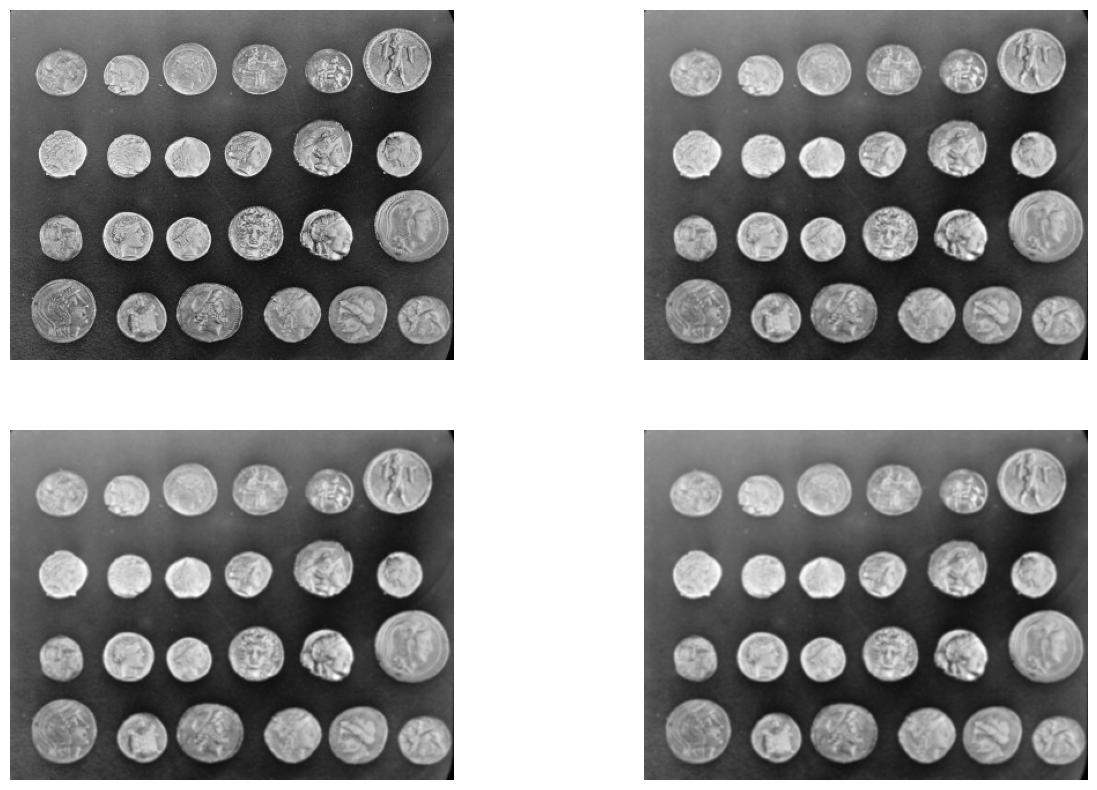

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread
from skimage import data
from scipy.ndimage import convolve

# Load an image
#image = imread('me.jpg', pilmode = 'F')
image = data.coins().astype(np.float32)
# YOUR CODE HERE


def gaussian_filter(image, size=9 , sigma=1):
    #meshgrid
    ax = np.linspace(-size // 2, size // 2, size)
    xx, yy = np.meshgrid(ax, ax)

    factor = 1 / (2 * np.pi * sigma**2)

    kernel = factor * np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return convolve(image, kernel)


filtered_image_3 = gaussian_filter(image, size=3)
filtered_image_5 = gaussian_filter(image, size = 5)
filtered_image_9 = gaussian_filter(image, size = 9)

fig = plt.figure(figsize=(15,10))
a=fig.add_subplot(2,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,2)
plt.imshow(filtered_image_3, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,3)
plt.imshow(filtered_image_5, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,4)
plt.imshow(filtered_image_9, cmap = 'gray')
plt.axis('off')

#plt.tight_layout()
plt.show()

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

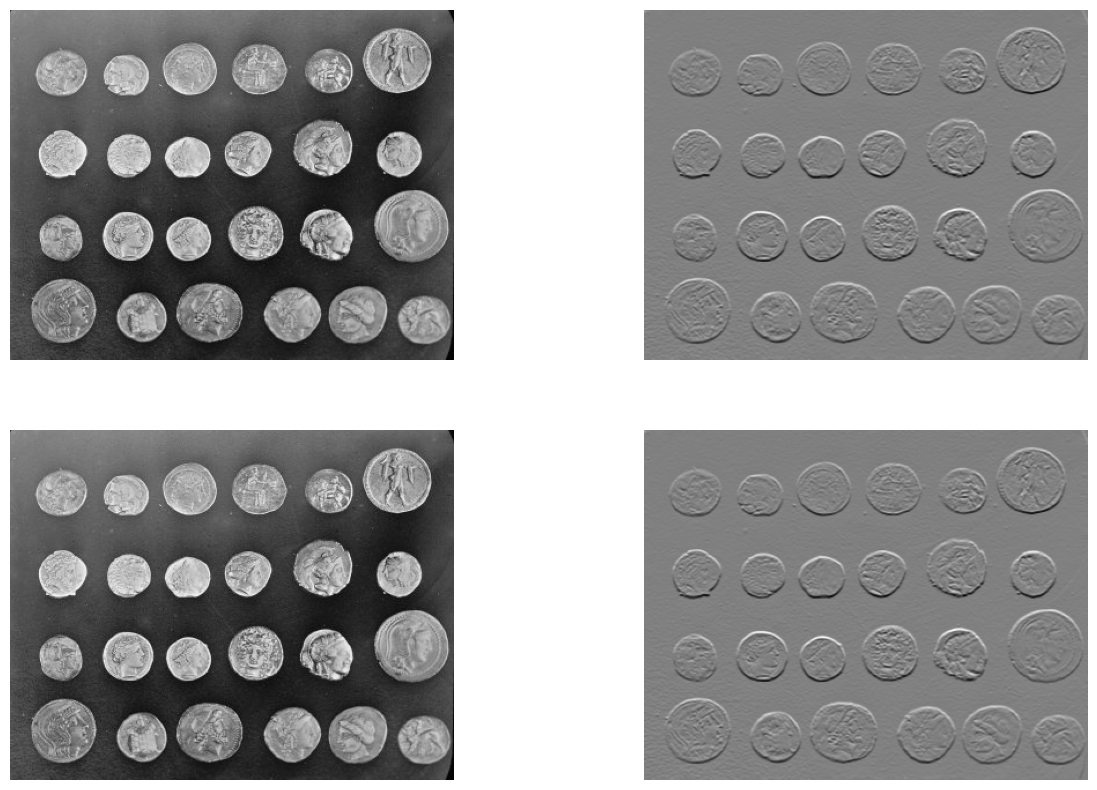

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread
from skimage import data
from scipy.ndimage import convolve

# Load an image
#image = imread('cold.jpg', pilmode = 'F')
image = data.coins().astype(np.float32)

operator_vertical = np.array([  [1, 0, -1],
                                [2, 0, -2],
                                [1, 0, -1],])

operator_diagonal = np.array([  [1, 2, 1],
                                [0, 0, 0],
                                [-1, -2, -1],])

operator_vertical_l = np.array([[0, -1, -2],
                                [1, 0, -1],
                                [2, 1, 0],])

opertor_vertical_r = np.array([ [2, 1, 0],
                                [1, 0, -1],
                                [0, -1, -2],])

def sobel_filter(operator, image):
    kernel = operator/4
    return convolve(image, kernel)

filtered_image = sobel_filter(operator_diagonal, image) # replace this by your solution


fig = plt.figure(figsize=(15,10))
a=fig.add_subplot(2,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,3)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(2,2,4)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')

plt.tight_layout
plt.show()

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) \cdot \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$. Use the allready defined gaussian kernel "gauss_5".

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.

* Why is Unsharp Masking sharpening an image?
* What is the difference between normalizing and clipping an image?


ANSWER

Unsharp Masking: 
* sharpening edges
* redusing smoothing
* -> by empahsizing the difference between original and unsharp image

Difference Normalization and Clipping
* Norm: porportially arragned between 0 and 1
* Clipping: Values are restricted to specific range, cutting off any values that fall outside this range

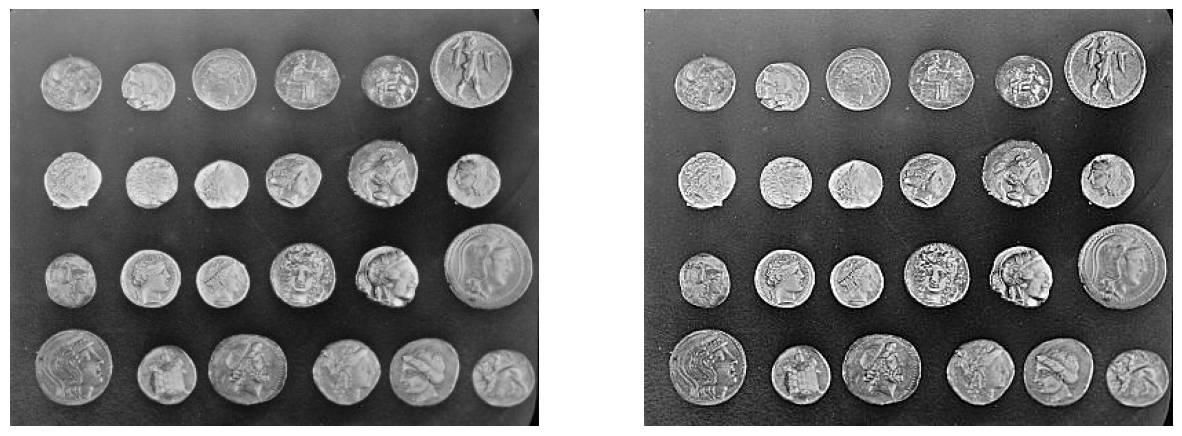

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio.v2 import imread
from skimage import data

# Load an image
#image = imread('some_file.png.jpg', mode='F')
image = data.coins().astype(np.float32)

# Define sharpening amount
amount = 1.5

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

# YOUR CODE HERE
def unsharp_mask(image, kernel, amount):
    unsharp_image = convolve(image, kernel)
    sharpened_image = image + (image - unsharp_image)* amount
    sharpened_image = np.clip(sharpened_image, 0, 255)
    return sharpened_image

unsharped_mask_image = unsharp_mask(image, gauss_5, amount)


fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(unsharped_mask_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Assignment 4: Implementing Convolution (4 points)

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel as arguments and return an image of the same size, containing the result of convolving the image with the kernel.

**(a)** First: you may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them in (b).

For the boundaries of an image $g(x,y)$, the convolution cannot be applied. Since $\displaystyle \hat{g}(x,y)=\sum_{i=0}^I\sum_{j=0}^{I}g(x+i-k,y+j-k)f(i,j)$ for $I\in[3,5,7,\dots]$, $k=$ int($\frac{I}{2}$)

**(b)** Now implement your function. Apply it with different kernels and compare the results with the output of the library function `scipy.ndimage.correlate` (bonus question: why not `scipy.ndimage.convolve`?).

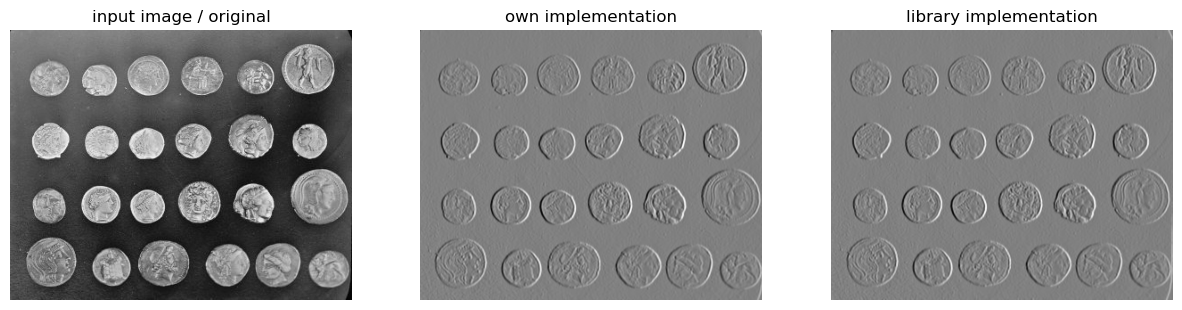

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
import scipy.ndimage

def convolve(frame, kernel):
    k = kernel.shape[0]
    x,y = frame.shape
    res = [frame[i:i+k,j:j+k] for i in range(x-k) for j in range(y-k)]
    res = np.array(res) * kernel
    res = res.reshape(x-k,y-k,k,k)
    return res.mean(axis=(2,3)) 

# Apply your function to an image:
image = iio.imread("imageio:coins.png").astype(np.float32)

# Try different filters (kernels)
kernel = 1/4 * np.asarray([[1,0,-1],[2,0,-2],[1,0,-1]])

fig = plt.figure(figsize=(15,7))
fig.add_subplot(1,3,1)
plt.title("input image / original")
plt.imshow(image, cmap = 'gray')
plt.axis('off')
fig.add_subplot(1,3,2)
plt.title("own implementation")
plt.imshow(convolve(image, kernel), cmap = 'gray')
plt.axis('off')
fig.add_subplot(1,3,3)
plt.title("library implementation")
plt.imshow(scipy.ndimage.correlate(image, kernel), cmap = 'gray')
plt.axis('off')
plt.show()